In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
df = pd.read_csv(os.path.join(os.getcwd(), r'Data\udemy_courses.csv'),parse_dates=['published_timestamp'])
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


## Question 1: What is the shape of the dataset (Total number of rows and columns)?

In [3]:
print('Total number of rows:', df.shape[0])
print('Total number of columns:', df.shape[1])

Total number of rows: 3678
Total number of columns: 12


## Question 2: Get the information about the dataset like total number of rows, columns, data types of each column and memory requirement.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

## Question 3: Check the null values in the dataset.

In [5]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## Question 4: Check for duplicated data in the dataset and drop them.

In [6]:
df.duplicated().any()

True

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

## Question 5: Find out number of courses per subject.

In [8]:
df.groupby('subject')['course_id'].count().sort_values(ascending=False)

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: course_id, dtype: int64

In [9]:
# Another way of solving this question is following:
df['subject'].value_counts(sort=True)

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

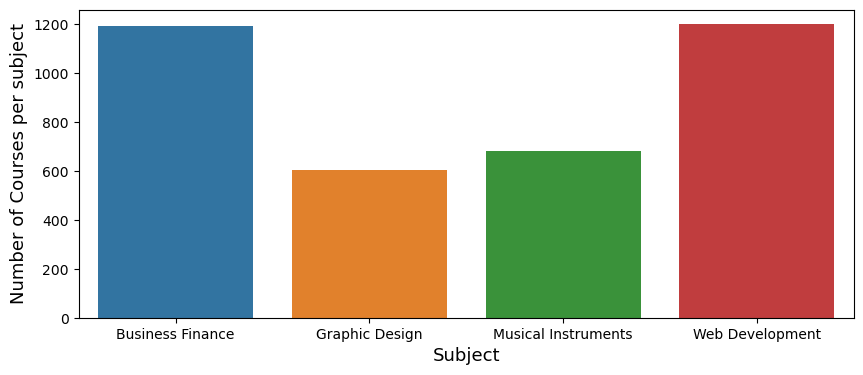

In [10]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='subject')
plt.xlabel('Subject',fontsize = 13)
plt.ylabel('Number of Courses per subject', fontsize = 13)
plt.show()

## Question 6: For which levels, Udemy courses provide the courses?

In [11]:
df['level'].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

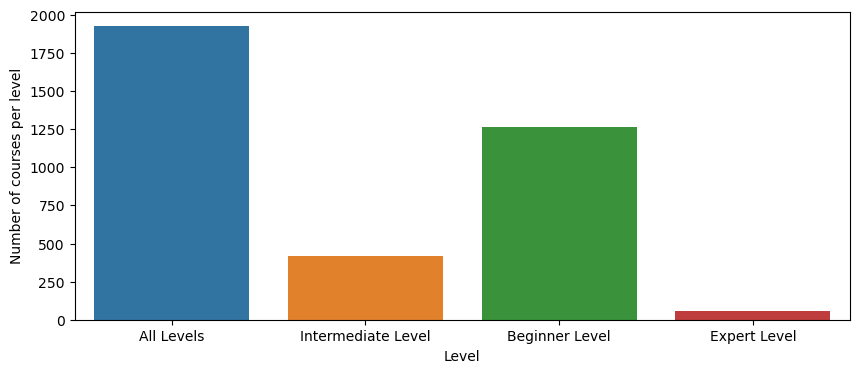

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='level')
plt.xlabel('Level')
plt.ylabel('Number of courses per level')
plt.show()

## Question 7: Display the count of Free and Paid courses.

In [13]:
df['is_paid'].value_counts()

is_paid
True     3362
False     310
Name: count, dtype: int64

In [14]:
# Another way of solving the problem is following:
print('Total number of paid courses are:', len(df[df['is_paid']==True]))
print('Total number of free courses are:', len(df[df['is_paid']==False]))

Total number of paid courses are: 3362
Total number of free courses are: 310


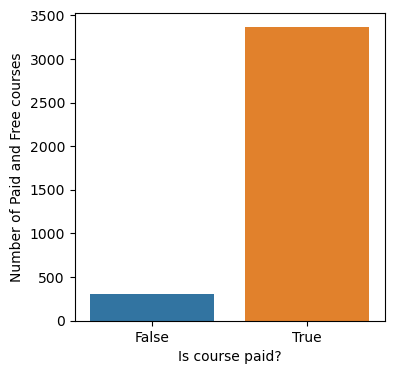

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='is_paid')
plt.xlabel('Is course paid?')
plt.ylabel('Number of Paid and Free courses')
plt.show()

## Question 8: Which course has more lectures, Free or Paid?

In [16]:
df.groupby('is_paid')['num_lectures'].sum().sort_values(ascending=False)

is_paid
True     140756
False      6639
Name: num_lectures, dtype: int64

## Question 9: Display the number of subscribers for Free and Paid courses.

In [17]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [18]:
df.groupby('is_paid')['num_subscribers'].sum().sort_values(ascending=False)

is_paid
True     8140310
False    3575525
Name: num_subscribers, dtype: int64

## Question 10: Which type of course has the higher number of subscribers, Free or Paid?

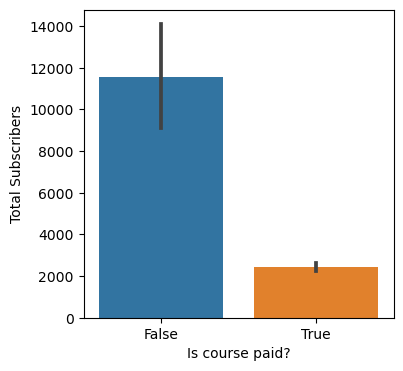

In [19]:
plt.figure(figsize=(4,4))
sns.barplot(x='is_paid', y='num_subscribers', data=df)
plt.xlabel('Is course paid?')
plt.ylabel('Total Subscribers')
plt.show()

## Question 11: Which level has the highest number of subscribers?

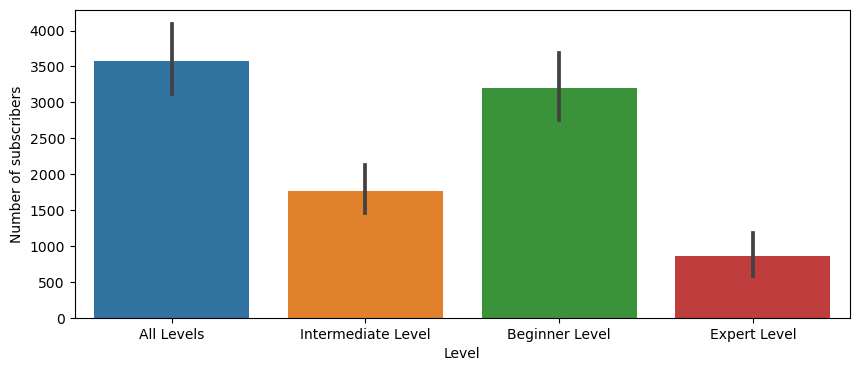

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='level', y='num_subscribers')
plt.xlabel('Level')
plt.ylabel('Number of subscribers')
plt.show()

## Question 12: Find the most popular course title.

In [21]:
print('The most popular course is:', df[df['num_subscribers']==df['num_subscribers'].max()]['course_title'].values[0])

The most popular course is: Learn HTML5 Programming From Scratch


## Question 13: Display top 10 courses by total number of subscribers.

In [22]:
top10df = df.sort_values(by='num_subscribers', ascending=False).head(10)

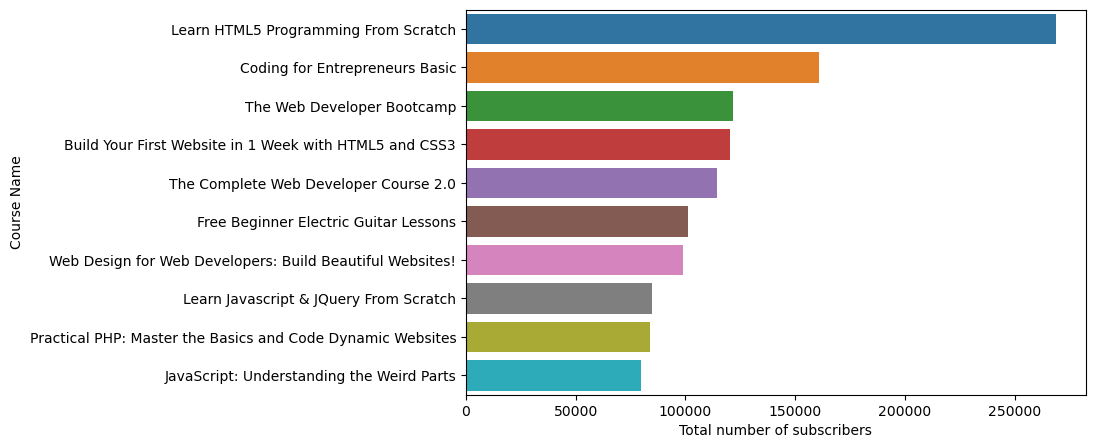

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=top10df, y='course_title', x='num_subscribers',orient='h')
plt.ylabel('Course Name')
plt.xlabel('Total number of subscribers')
plt.show()

## Question 14: Which course has the highest number of reviews?

In [24]:
print('The course with highest reviews is:', df[df['num_reviews'] == df['num_reviews'].max()]['subject'].values[0])

The course with highest reviews is: Web Development


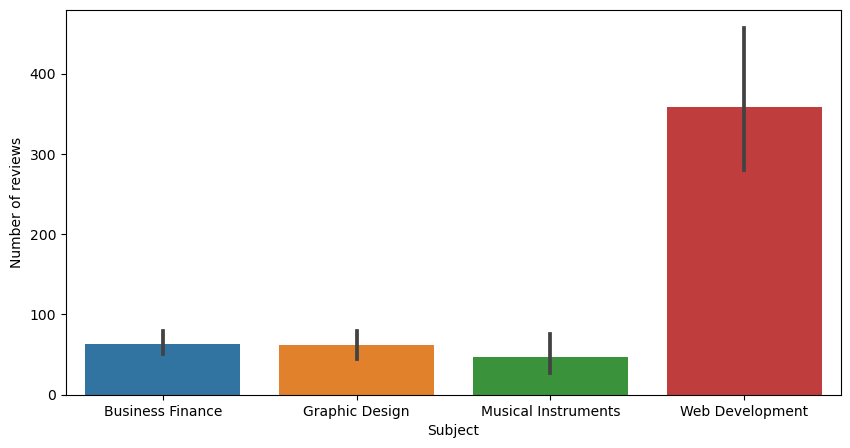

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='subject', y='num_reviews')
plt.xlabel('Subject')
plt.ylabel('Number of reviews')
plt.show()

## Question 15: Does price effect the number of reviews?

In [26]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance


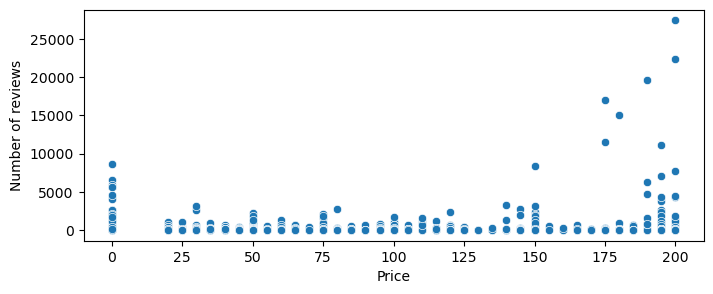

In [27]:
plt.figure(figsize=(8,3))
sns.scatterplot(data=df, y='num_reviews', x='price')
plt.ylabel('Number of reviews')
plt.xlabel('Price')
plt.show()

## Question 16: Find the total number of courses related to python.

In [28]:
print('Total number of courses related to Python are:', len(df[df['course_title'].str.contains('Python',case=False)]))

Total number of courses related to Python are: 29


## Question 17: Display 10 most popular courses on python by total number of subscribers.

In [29]:
python_df = df[df['course_title'].str.contains('Python', case=False)][['course_title','num_subscribers']].sort_values(by='num_subscribers',ascending=False).head(10)
python_df

,course_title,num_subscribers
2497,Web Programming with Python,35267
2570,"Coding for Entrepreneurs: Learn Python, Django...",23412
2528,Learn Python and Django: Payment Processing,17714
3200,Python and Django Full Stack Web Developer Boo...,11832
3507,Fun and creative web engineering with Python a...,10917
2553,The Complete Ethical Hacking Course 2.0: Pytho...,7827
3138,Complete Python Web Course: Build 8 Python Web...,7489
3197,Try Django 1.9 | Build a Blog and Learn Python...,7407
2681,Python for Beginners: Python Programming Langu...,6153
3203,REST APIs with Flask and Python,5151


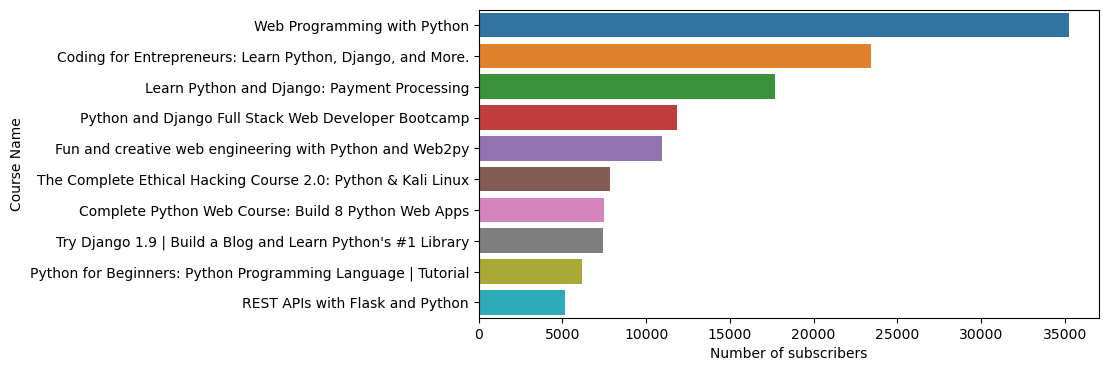

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(data=python_df, y='course_title', x='num_subscribers')
plt.ylabel('Course Name')
plt.xlabel('Number of subscribers')
plt.show()

## Question 18: In which year the highest number of courses were posted?

In [31]:
df['Year'] = df['published_timestamp'].dt.year

In [32]:
df.groupby('Year')['course_id'].count().sort_values(ascending=False)

Year
2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: course_id, dtype: int64

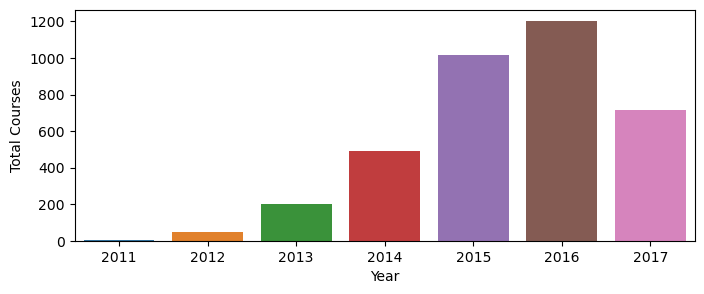

In [33]:
plt.figure(figsize=(8,3))
sns.countplot(data=df, x='Year')
plt.xlabel('Year')
plt.ylabel('Total Courses')
plt.show()

## Question 19: Display category-wise count of posted subjects (year wise).

In [34]:
category_df = df.groupby('Year')['subject'].value_counts()
category_df

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Musical Instruments     10
      Graphic Design          10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Web Development        223
      Business Finance       223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64